In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [0]:
batch_size = 128
num_classes = 10
epochs = 12

In [0]:
img_rows, img_cols = 28, 28

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Model 1: 3 convolutional layer

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3),activation='relu'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [0]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 68s 1ms/step - loss: 0.2760 - acc: 0.9161 - val_loss: 0.0895 - val_acc: 0.9708
Epoch 2/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1426 - acc: 0.9589 - val_loss: 0.0571 - val_acc: 0.9821
Epoch 3/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1132 - acc: 0.9672 - val_loss: 0.0556 - val_acc: 0.9845
Epoch 4/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0998 - acc: 0.9723 - val_loss: 0.0484 - val_acc: 0.9857
Epoch 5/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0900 - acc: 0.9747 - val_loss: 0.0362 - val_acc: 0.9889
Epoch 6/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0824 - acc: 0.9767 - val_loss: 0.0475 - val_acc: 0.9870
Epoch 7/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0770 - acc: 0.9790 - val_loss: 0.0466 - val_acc

Test loss: 0.03899886542790646
Test accuracy: 0.9888


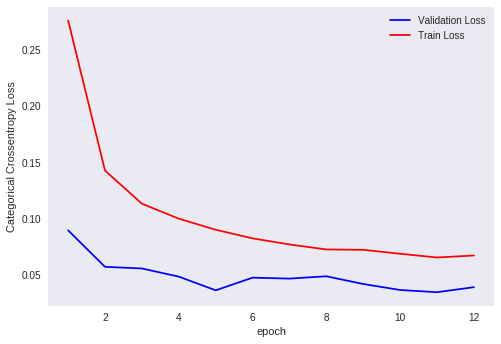

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Model 2: 5 convolutional layer

In [0]:
from keras.layers import  BatchNormalization

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),activation='relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(2, 2),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(2, 2),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Conv2D(128, kernel_size=(2, 2),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(2, 2),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [13]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 21s 358us/step - loss: 1.3492 - acc: 0.5311 - val_loss: 0.4087 - val_acc: 0.9483
Epoch 2/12
60000/60000 [==============================] - 18s 296us/step - loss: 0.9433 - acc: 0.6766 - val_loss: 0.2985 - val_acc: 0.9671
Epoch 3/12
60000/60000 [==============================] - 18s 297us/step - loss: 0.8652 - acc: 0.6960 - val_loss: 0.2397 - val_acc: 0.9789
Epoch 4/12
60000/60000 [==============================] - 18s 295us/step - loss: 0.8294 - acc: 0.7091 - val_loss: 0.2097 - val_acc: 0.9818
Epoch 5/12
60000/60000 [==============================] - 18s 298us/step - loss: 0.7820 - acc: 0.7207 - val_loss: 0.2032 - val_acc: 0.9808
Epoch 6/12
60000/60000 [==============================] - 18s 297us/step - loss: 0.7705 - acc: 0.7257 - val_loss: 0.1752 - val_acc: 0.9863
Epoch 7/12
60000/60000 [==============================] - 18s 298us/

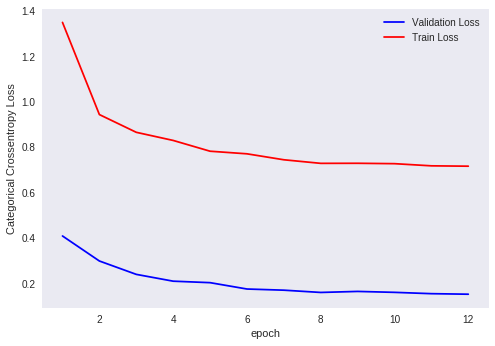

In [15]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Model 3: 7convolutional layer

In [0]:
from keras.layers import  BatchNormalization
model = Sequential()
model.add(Conv2D(32, kernel_size=(2,2),activation='relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(2,2),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(2,2),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(512, kernel_size=(2,2),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(2,2),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(2,2),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(2,2),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [18]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 81s 1ms/step - loss: 1.2123 - acc: 0.5546 - val_loss: 0.2543 - val_acc: 0.9397
Epoch 2/12
60000/60000 [==============================] - 78s 1ms/step - loss: 0.8338 - acc: 0.6634 - val_loss: 0.1111 - val_acc: 0.9762
Epoch 3/12
60000/60000 [==============================] - 78s 1ms/step - loss: 0.7547 - acc: 0.6901 - val_loss: 0.0831 - val_acc: 0.9825
Epoch 4/12
60000/60000 [==============================] - 78s 1ms/step - loss: 0.7196 - acc: 0.7046 - val_loss: 0.0635 - val_acc: 0.9868
Epoch 5/12
60000/60000 [==============================] - 78s 1ms/step - loss: 0.6941 - acc: 0.7220 - val_loss: 0.0632 - val_acc: 0.9874
Epoch 6/12
60000/60000 [==============================] - 78s 1ms/step - loss: 0.6742 - acc: 0.7358 - val_loss: 0.0671 - val_acc: 0.9892
Epoch 7/12
60000/60000 [==============================] - 78s 1ms/step - loss: 0.6613 - acc: 0.7451 - val_loss: 0.0665 - val_acc

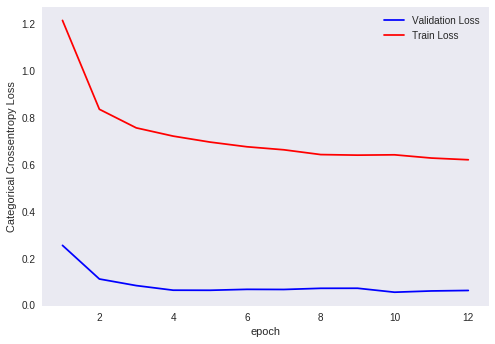

In [19]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**Conclusion:**

In [21]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["MOdel","Test AUC","Test Loss"]

x.add_row([" Model 1: 3 convolutional layer","98.88%","0.03899886542790646"])
x.add_row(["Model 2: 5 convolutional layer","98.86%","0.15232067085504533"])
x.add_row(["Model 3: 7 convolutional layer","98.92%","0.062323937116935846"])


print(x)

+---------------------------------+----------+----------------------+
|              MOdel              | Test AUC |      Test Loss       |
+---------------------------------+----------+----------------------+
|  Model 1: 3 convolutional layer |  98.88%  | 0.03899886542790646  |
|  Model 2: 5 convolutional layer |  98.86%  | 0.15232067085504533  |
|  Model 3: 7 convolutional layer |  98.92%  | 0.062323937116935846 |
+---------------------------------+----------+----------------------+



1) As number of layers increases accuracy increases.
2) Test loss very loss in 3 convolutional layer.
